# SVM Train and predict with one mechanism 
This workbook is a study in training and evaluating one mechanism from the SVM study. 
[See the main SVM workbook](SVM%20-%20Quick%20and%20Dirty.ipynb)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandasql import sqldf
from random_profiles import RandomProfileGenerator

pd.options.display.max_rows = 5
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [16]:
# get data
data = pd.read_excel('Data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Labels.xlsx')

print('Select Mechanism with greatest count ')
# Select Mechanism with greatest count 
pqry('''SELECT Mechanism, count(Mechanism) count FROM data m group by Mechanism order by count(Mechanism) desc LIMIT 1;''')


Select Mechanism with greatest count 


,Mechanism,count
0,mTOR inhibitor,27


In [17]:
# Impute missing
grouped = data.iloc[:,2:].groupby(data["Mechanism"])
f = lambda x: x.fillna(x.mean())
data.iloc[:,2:] = grouped.transform(f)
#data[75:82]

In [19]:
# read in list of mechanisms:
mechanisms = pqry('''SELECT distinct Mechanism from data''').values.ravel()

In [5]:
# Generate positive class from current mechanism
# set mechanism under study. We can look over other mechanisms on this model.
mechanism = 'mTOR inhibitor'

# establish positive class data. We'll compare this against the negative class generated as random profiles.
pos_class = data.loc[data.Mechanism == mechanism].drop(columns=['BioMAP Viewer Mixed Profile'])
#pos_class

,Mechanism,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
286,mTOR inhibitor,-0.025125,0.029661,0.007285,-0.007217,-0.018684,-0.035632,0.073062,-0.004618,-0.026744,0.023235,0.027208,-0.051157,-0.029659,0.001539,0.000379,-0.080849,-0.048609,-0.007124,-0.096828,-0.106795,-0.018441,-0.067720,0.005005,0.000103,0.004785,-0.023476,-0.036917,-0.007017,0.025684,0.019521,-0.033865,0.002584,0.070305,-0.021818,0.024542,-0.012663,-0.051909,-0.008576,0.157562,-0.055633,0.040063,-0.046986,-0.059191,-0.040126,0.047702,0.002455,-0.025488,-0.000264,-0.018294,-0.060604,-0.065437,-0.035152,0.013511,0.020058,0.025089,0.000734,0.012278,-0.063808,-0.042104,0.007731,-0.023541,-0.245918,-0.069942,-0.099983,-0.016990,0.014641,-0.061335,-0.009421,-0.075236,-0.043245,0.006529,-0.008190,-0.008398,-0.034474,-0.0

### Generate Random profile
We need negative class data to train the model [See random Profiles example](Print Random Profiles.ipynb)

In [21]:
# Generate negative class
# Initialize the random profile genearator with sig env values and profile data file for S:M
#random_profile_number = 317
random_profile_number=len(pos_class)
envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
np.random.seed(42) # ensure reprodicble results

rpg = RandomProfileGenerator(envelope_file='SigEnvelopeFile.xml', data_file='SVMData.xlsx')
neg_values = rpg.get_random_profiles(prof_num=random_profile_number, envelope=envelope,conf=conf, dist='rand')
neg_mech = pd.DataFrame({'Mechanism': ['neg_class' for s in range(random_profile_number)]})
neg_class = pd.concat([neg_mech, neg_values], axis=1)
#neg_class 

,Mechanism,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,neg_class,-0.014481,0.061243,0.014708,0.012421,-0.032603,-0.034311,-0.052341,0.029572,0.012267,0.024161,-0.063475,0.074368,0.041469,-0.012646,-0.019924,-0.044767,-0.021694,0.002017,-0.010110,-0.030447,0.013031,-0.050716,-0.031158,-0.009651,-0.003208,0.027993,-0.029456,0.001257,0.010493,-0.041101,0.012363,-0.026688,-0.061328,0.071831,0.044039,0.032721,-0.029871,-0.058442,0.021868,-0.005018,-0.070240,-0.000566,-0.046589,0.047997,-0.035773,0.022227,-0.030424,0.001737,0.003670,-0.042362,0.043737,0.026451,0.033639,0.036174,0.011268,0.025026,-0.037069,-0.030712,-0.045495,-0.013743,-0.010429,-0.026510,0.029409,-0.023988,-0.020623,0.003572,-0.053933,0.042513,-0.041915,0.072459,0.033040,-0.028315,-0.066171,0.042139,0.025944,0.018902,

In [22]:
# Generate all classes by combining positive and negative classes
all_class = pd.concat([pos_class, neg_class]).reset_index(drop=True)

# encode mechanism to int values
all_class['Mechanism'] = all_class['Mechanism'].map({mechanism:1, 'neg_class':0})

In [31]:
X = all_class.iloc[:,1:]
Y = all_class.iloc[:,0]

# scale profiles with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

[-5.82099691e-04 -1.46829629e-03  1.87261832e-03 -2.58089143e-03
 -1.55135209e-03 -1.90410660e-03  1.49299947e-03 -1.69887019e-03
 -6.16718069e-03  2.49934893e-03  8.67289846e-04 -4.71519859e-03
 -2.23210419e-03 -9.82113250e-04 -8.87881766e-04 -2.66910270e-03
 -4.90666720e-03 -1.32666570e-03 -1.08314910e-02 -2.32438355e-02
 -6.26484014e-03  1.40869614e-03  1.46740312e-03  1.84369204e-03
 -5.01296256e-04  1.13288757e-03 -8.89700639e-04 -2.30619884e-03
  2.13670168e-03  2.50681360e-03 -3.50288759e-03 -3.86739044e-03
  6.86287910e-03 -1.17631259e-02  2.15276332e-03 -2.67865293e-03
 -3.52193371e-03 -7.32596901e-03  8.84711100e-03 -7.78668654e-03
 -3.46587174e-03 -7.18823987e-03 -8.30489295e-03 -4.75289566e-03
  5.87812619e-03  5.11491158e-04 -6.08895545e-04 -1.51033095e-03
 -1.52841691e-03 -1.79461754e-02 -8.12430604e-03 -5.97764652e-03
 -1.55528558e-03 -2.89697126e-03  6.68855401e-03  4.51708328e-05
  4.66028757e-04 -1.01583175e-02 -1.47329427e-03  3.05381228e-04
 -7.05418724e-03 -2.70572

array([[-0.7543133 ,  0.82302258,  0.30011931, ..., -2.41137896,
        -0.45059783, -1.41843295],
       [ 0.23009222,  1.08630204, -0.13201407, ..., -2.78934048,
        -0.50832469, -2.00831188],
       [-0.57971605, -0.35620336,  0.568911  , ..., -3.12101881,
         0.31359085, -2.77049288],
       ...,
       [ 0.92076422,  1.26112829,  1.5809595 , ...,  0.03084699,
        -1.24430019,  0.40311933],
       [-0.06329741, -1.74210118,  1.56856868, ...,  0.60918971,
         1.52957411, -0.21390727],
       [ 0.06967691, -0.07832396,  1.39996621, ..., -0.17314439,
         1.39791131,  0.68947941]])

In [23]:
# test train split
from sklearn.model_selection import train_test_split



# Split the data into tarining and testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.1, 
                                                    random_state = 42,
                                                    stratify = Y # startify, so we get the same proportion in train and test
                                                   )

# Split the data into tarining and testing set
X_train, X_cv, y_train, y_cv = train_test_split(    X_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y_train # startify, so we get the same proportion in train and test
                                                   )



#features_train, features_cv, labels_train, labels_cv = train_test_split(features_train, 
#                                                                            labels_train, 
#                                                                            test_size = 0.1, 
#                                                                            random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
#print("Cross validation set has {} samples.".format(features_cv.shape[0]))
print("Testing  set has {} samples.".format(X_cv.shape[0]))



Training set has 247 samples.
Testing  set has 62 samples.


In [24]:
print("Proportion of positive class in training set: ", sum(y_train) / len(y_train))
print("Proportion of positive class in testing set: {:.3f}".format(sum(y_cv) / len(y_cv)))

Proportion of positive class in training set:  0.07692307692307693
Proportion of positive class in testing set: 0.081


In [26]:
# Naive Predictor
model_pred = np.ones(len(Y), dtype=int)


TP = np.sum(Y) # Counting the ones as this is the naive case.
FP = Y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / float(TP + FP) 
recall = TP / float(TP + FN)
precision = TP / float(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
from sklearn.metrics import fbeta_score
fscore =  fbeta_score(Y, model_pred, beta=0.5)

# Print the results 
print( "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.0785, F-score: 0.0962]


C:\Users\antalb\AppData\Local\Continuum\anaconda3\envs\Py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\antalb\AppData\Local\Continuum\anaconda3\envs\Py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


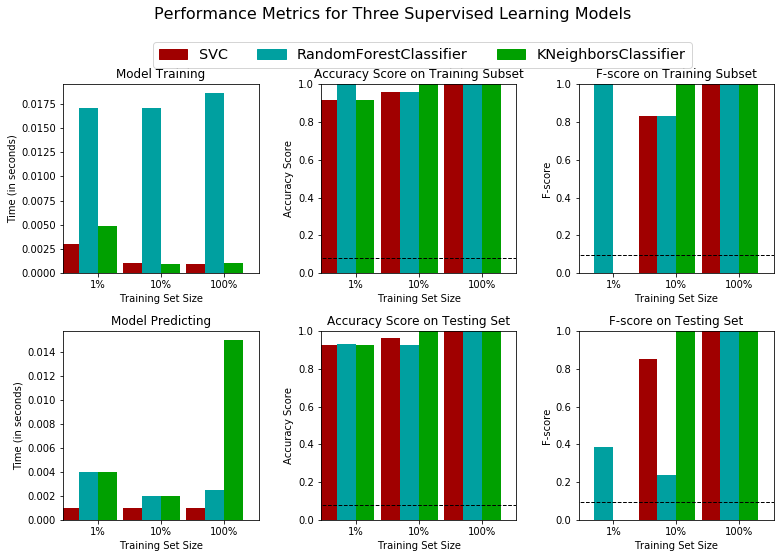

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import visuals as vs

# Initialize the three models
clf_A = SVC(kernel='linear')
clf_B = RandomForestClassifier(random_state=0) 
clf_C = KNeighborsClassifier(n_neighbors=3)
#clf_C = DecisionTreeClassifier(random_state=0)
#clf_C = RandomForestClassifier(random_state=0)


# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = 1.0
samples_10 = 0.1
samples_1 = 0.05

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        vs.train_predict2(clf, samples, X_train, y_train, X_cv, y_cv)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [28]:
# GridSearch
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)
#parameters = { 'C':[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
parameters = { 'C':[0.1, 0.5, 1.0, 2.0, 5.0]}


# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(fbeta_score, beta=0.5)


# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print ( "Unoptimized model\n------")
print ( "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ( "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ( "\nOptimized Model\n------")
print ( "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ( "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ( "grid_fit.best_params_:", grid_fit.best_params_)

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
grid_fit.best_params_: {'C': 1.0}


C:\Users\antalb\AppData\Local\Continuum\anaconda3\envs\Py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\antalb\AppData\Local\Continuum\anaconda3\envs\Py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\antalb\AppData\Local\Continuum\anaconda3\envs\Py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


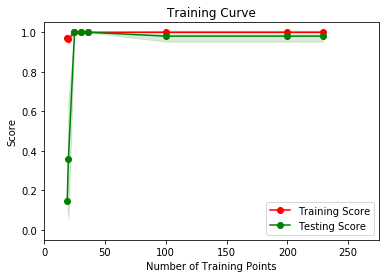

In [29]:
from sklearn.model_selection import StratifiedKFold
import sklearn.model_selection as curves

import matplotlib.pyplot as plt


K = 5
data_size = random_profile_number + len(pos_class)

ts_min = (len(neg_class) + 1) / K


cv = StratifiedKFold(n_splits=K, shuffle=False, random_state=42)
train_sizes=[19, 20, 25, 30, 36, 100, 200, 229]

#train_sizes, train_scores, valid_scores = learning_curve( best_clf, X, Y, cv = sk, train_sizes=[ 20, 50, 75, 84])

 # Calculate the training and testing scores
sizes, train_scores, test_scores = curves.learning_curve(best_clf, X, Y, 
                                                         #cv = cv, 
                                                         train_sizes = train_sizes, 
                                                         scoring = 'f1')

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


# Subplot the learning curve 
ax = plt.subplot()
ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Labels
ax.set_title('Training Curve')
ax.set_xlabel('Number of Training Points')
ax.set_ylabel('Score')
ax.set_xlim([0, X.shape[0]*0.8])
ax.set_ylim([-0.05, 1.05])

# Visual aesthetics
plt.legend(loc = 'lower right')
plt.ylim([-0.05,1.05])
plt.show()

In [ ]:
# predict a negative class
target_mechanism = 'mTOR inhibitor'

# establish positive class data. We'll compare this against the negative class generated as random profiles.
pos_class = data.loc[data.Mechanism == mechanism].drop(columns=['BioMAP Viewer Mixed Profile'])